# <font size=6 color='green'><center>**IT 496 - Introduction to Data Mining**</center></font>
### **<center>Course Project - 03<br/><br/>ICC Cricket World Cup 2023 ML Challange<center>**

 &emsp; **Group Name : <font color='#0099ff'>DataForce</font>** <br/>
 &emsp; **Group ID : <font color='#0099ff'>T06</font>**

**Problem Statement**: Given two teams name and the venue where the match will be held, the model will predict the winning team

To do this, parameters like ICC ODI rankings of both the teams, the average run rate of the teams(which is calcualted using the average performance of all the players in the team), matches played, average win rate of the team and so on which is collected from the last 6 world cup matches and the last 7 odi matches

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
matches_data = pd.read_csv('../Dataset/Matches_stats.csv')
matches_data.head()

,season,team1,team2,date,winner,Venue
0,2023,England,New Zealand,2023/10/05,New Zealand,"Narendra Modi Stadium, Ahmedabad"
1,2023,Pakistan,Netherlands,2023/10/06,Pakistan,"Rajiv Gandhi International Stadium, Hyderabad"
2,2023,Afghanistan,Bangladesh,2023/10/07,Bangladesh,"Himachal Pradesh Cricket Association Stadium, ..."
3,2023,South Africa,Sri Lanka,2023/10/07,South Africa,"Arun Jaitley Stadium, Delhi"
4,2023,Australia,India,2023/10/08,India,"MA Chidambaram Stadium, Chennai"


In [3]:
team_stats = pd.read_csv('../Dataset/ICC_Team_Stats.csv')
team_stats.head()

,Team Name,Team ID,ICC Ranking(ODI),Matches,Avg Score,Avg Wickets,Avg Catches,Avg Fours,Avg Sixes,Avg Half Centuries,Avg Centuries
0,Afghanistan,1,9,28,20.898438,58.206061,18.333333,89.933333,24.000000,1.133333,6.600000
1,Australia,2,2,38,23.453834,59.333333,34.600000,191.333333,47.266667,4.532184,12.677273
2,Bangladesh,3,8,43,22.764610,69.376970,24.666667,164.933333,24.066667,2.812644,12.140404
3,England,4,6,36,25.688889,77.139394,29.866667,190.333333,44.133333,4.000000,9.200000
4,India,5,1,52,25.180872,85.376970,38.800000,244.555705,55.894855,8.437931,16.080808


In [4]:
teams_data = pd.read_csv('../Dataset/ICC_23_Teams_List.csv')
teams_data.head()

,Team Name,Team ID,ICC Ranking(ODI),Matches
0,Afghanistan,1,9,28
1,Australia,2,2,38
2,Bangladesh,3,8,43
3,England,4,6,36
4,India,5,1,52


Each team is given a unique team ID which will be used for label encoding

In [5]:
teams_mapping={}
for index,row in teams_data.iterrows():
  teams_mapping[row['Team Name']] = row['Team ID']
teams_mapping

{'Afghanistan': 1,
 'Australia': 2,
 'Bangladesh': 3,
 'England': 4,
 'India': 5,
 'Netherlands': 6,
 'New Zealand': 7,
 'Pakistan': 8,
 'South Africa': 9,
 'Sri Lanka': 10}

Similar mapping should be done for all the Venues

In [6]:
venues_data = pd.read_csv('../Dataset/ICC_VenuesList.csv')
venues_data.head()

,Venue,venue ID
0,"Narendra Modi Stadium, Ahmedabad",1
1,"Rajiv Gandhi International Stadium, Hyderabad",2
2,"Himachal Pradesh Cricket Association Stadium, ...",3
3,"Arun Jaitley Stadium, Delhi",4
4,"MA Chidambaram Stadium, Chennai",5


In [7]:
venues_mapping = {}
for index,row in venues_data.iterrows():
  venues_mapping[row['Venue']] = row['venue ID']
venues_mapping

{'Narendra Modi Stadium, Ahmedabad': 1,
 'Rajiv Gandhi International Stadium, Hyderabad': 2,
 'Himachal Pradesh Cricket Association Stadium, Dharamsala': 3,
 'Arun Jaitley Stadium, Delhi': 4,
 'MA Chidambaram Stadium, Chennai': 5,
 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow': 6,
 'Maharashtra Cricket Association Stadium, Pune': 7,
 'M Chinnaswamy Stadium, Bengaluru': 8,
 'Wankhede Stadium, Mumbai': 9,
 'Eden Gardens, Kolkata': 10,
 'The Cooper Associates County Ground, Taunton': 11,
 'Emirates Old Trafford, Manchester': 12,
 'Headingley, Leeds': 13,
 'Sophia Gardens, Cardiff': 14,
 'Kennington Oval, London': 15,
 'County Ground, Bristol': 16,
 'Edgbaston, Birmingham': 17,
 'Trent Bridge, Nottingham': 18,
 "Lord's, London": 19,
 'Riverside Ground, Chester-le-Street': 20,
 'The Rose Bowl, Southampton': 21,
 'Saxton Oval, Nelson': 22,
 'The Gabba, Brisbane': 23,
 'Manuka Oval, Canberra': 24,
 'McLean Park, Napier': 25,
 'Adelaide Oval, Adelaide': 26,
 'Seddon P

Adding teamwise statistics in matches data

In [8]:
additional_cols1 = ['team1 avg score','team1 avg wickets','team1 avg catches','team1 avg fours',
                   'team1 avg sixes','team1 odi rank']
additional_cols2 = ['team2 avg score','team2 avg wickets','team2 avg catches','team2 avg fours',
                   'team2 avg sixes','team2 odi rank']
mapped_cols = ['Avg Score','Avg Wickets','Avg Catches','Avg Fours','Avg Sixes','ICC Ranking(ODI)']

In [9]:
def getTeamData(team):
    return team_stats[team_stats['Team Name']==team][mapped_cols].values

In [10]:
for index, row in matches_data.iterrows():
  matches_data.loc[index,additional_cols1]=getTeamData(row['team1'])[0]
  matches_data.loc[index,additional_cols2]=getTeamData(row['team2'])[0]

  # labelling winner as (0,1) 
  # 0 - if team 1 winse, else 1
  if row['team1']==row['winner']:
    matches_data.loc[index,['winner']] = 0
  else:
    matches_data.loc[index,['winner']] = 1
matches_data.head()

,season,team1,team2,date,winner,Venue,team1 avg score,team1 avg wickets,team1 avg catches,team1 avg fours,team1 avg sixes,team1 odi rank,team2 avg score,team2 avg wickets,team2 avg catches,team2 avg fours,team2 avg sixes,team2 odi rank
0,2023,England,New Zealand,2023/10/05,1,"Narendra Modi Stadium, Ahmedabad",25.688889,77.139394,29.866667,190.333333,44.133333,6.0,18.430865,72.762424,27.533333,121.666667,25.133333,5.0
1,2023,Pakistan,Netherlands,2023/10/06,0,"Rajiv Gandhi International Stadium, Hyderabad",25.264286,57.553939,17.466667,112.133333,22.533333,4.0,20.506234,41.101818,6.866667,48.466667,8.600000,14.0
2,2023,Afghanistan,Bangladesh,2023/10/07,1,"Himachal Pradesh Cricket Association Stadium, ...",20.898438,58.206061,18.333333,89.933333,24.000000,9.0,22.764610,69.376970,24.666667,164.933333,24.066667,8.0
3,2023,South Africa,Sri Lanka,2023/10/07,0,"Arun Jaitley Stadium, Delhi",22.147129,64.220606,20.000000,121.000000,27.200000,3.0,22.910765,37.110303,15.133333,109.000000,15.400000,7.0
4,2023,Australia,India,2023/10/08,1,"MA Chidambaram Stadium, Chennai",23.453834,59.333333,34.600000,191.333333,47.266667,2.0,25.180872,85.376970,38.800000,244.555705,55.894855,1.0


In [11]:
# dropping the date column
matches_data = matches_data.drop(['date'],axis=1)

Perform encoding for team names and venues

In [12]:
matches_data['team1'] = matches_data['team1'].apply(lambda x:teams_mapping[x])
matches_data['team2'] = matches_data['team2'].apply(lambda x:teams_mapping[x])
matches_data['Venue'] = matches_data['Venue'].apply(lambda x:venues_mapping[x])
matches_data.head()

,season,team1,team2,winner,Venue,team1 avg score,team1 avg wickets,team1 avg catches,team1 avg fours,team1 avg sixes,team1 odi rank,team2 avg score,team2 avg wickets,team2 avg catches,team2 avg fours,team2 avg sixes,team2 odi rank
0,2023,4,7,1,1,25.688889,77.139394,29.866667,190.333333,44.133333,6.0,18.430865,72.762424,27.533333,121.666667,25.133333,5.0
1,2023,8,6,0,2,25.264286,57.553939,17.466667,112.133333,22.533333,4.0,20.506234,41.101818,6.866667,48.466667,8.600000,14.0
2,2023,1,3,1,3,20.898438,58.206061,18.333333,89.933333,24.000000,9.0,22.764610,69.376970,24.666667,164.933333,24.066667,8.0
3,2023,9,10,0,4,22.147129,64.220606,20.000000,121.000000,27.200000,3.0,22.910765,37.110303,15.133333,109.000000,15.400000,7.0
4,2023,2,5,1,5,23.453834,59.333333,34.600000,191.333333,47.266667,2.0,25.180872,85.376970,38.800000,244.555705,55.894855,1.0


In [13]:
matches_data.shape

(655, 17)

Now the data is ready for training!!!

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler
from tensorflow import keras

Train test split

In [15]:
X_data = matches_data.drop('winner',axis=1)
Y_data = matches_data['winner']
xtrain,xtest,ytrain,ytest = train_test_split(X_data,Y_data,test_size=0.2,random_state=40,shuffle=True)
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(524, 16) (524,)
(131, 16) (131,)


In [16]:
# normalizing train and test sets seperately so that no information from
# test set will be leaked
scaler = RobustScaler()
scaler.fit(xtrain)
xtrain = scaler.transform(xtrain)
xtest = scaler.transform(xtest)

print(f"Shape of training data after normalizing = {xtrain.shape}")
print(f"Shape of test data after normalizing = {xtest.shape}")

Shape of training data after normalizing = (524, 16)
Shape of test data after normalizing = (131, 16)


In [17]:
# saving robust scaler fitter on x_train to use it at inference time
import pickle 
with open('RobustScaler.pkl','wb') as f:
  pickle.dump(scaler, f)

In [18]:
from keras.utils import to_categorical 

xtrain=np.asarray(xtrain)
ytrain=to_categorical(np.asarray(ytrain.astype('int')),num_classes=2)
xtest=np.asarray(xtest)
ytest=to_categorical(np.asarray(ytest.astype('int')),num_classes=2)

Using a Neural Network for performing classification

In [71]:
from tensorflow import keras
import tensorflow as tf

# model building
model=keras.models.Sequential()
model.add(keras.layers.Dense(20,input_dim=16,activation='relu'))
model.add(keras.layers.Dense(10,activation='relu'))
model.add(keras.layers.Dense(5,activation='relu'))
model.add(keras.layers.Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 20)                340       
                                                                 
 dense_17 (Dense)            (None, 10)                210       
                                                                 
 dense_18 (Dense)            (None, 5)                 55        
                                                                 
 dense_19 (Dense)            (None, 2)                 12        
                                                                 
Total params: 617
Trainable params: 617
Non-trainable params: 0
_________________________________________________________________


In [76]:
history = model.fit(xtrain,ytrain,epochs=50,validation_split=0.15)

Epoch 1/50
14/14 [==============================] - 0s 5ms/step - loss: 0.4104 - accuracy: 0.7910 - val_loss: 0.3272 - val_accuracy: 0.8608
Epoch 2/50
14/14 [==============================] - 0s 4ms/step - loss: 0.4042 - accuracy: 0.8045 - val_loss: 0.3482 - val_accuracy: 0.8608
Epoch 3/50
14/14 [==============================] - 0s 3ms/step - loss: 0.3990 - accuracy: 0.8112 - val_loss: 0.3427 - val_accuracy: 0.8734
Epoch 4/50
14/14 [==============================] - 0s 3ms/step - loss: 0.3961 - accuracy: 0.8157 - val_loss: 0.3519 - val_accuracy: 0.8354
Epoch 5/50
14/14 [==============================] - 0s 3ms/step - loss: 0.3948 - accuracy: 0.8090 - val_loss: 0.3632 - val_accuracy: 0.8228
Epoch 6/50
14/14 [==============================] - 0s 3ms/step - loss: 0.3962 - accuracy: 0.7955 - val_loss: 0.3499 - val_accuracy: 0.8228
Epoch 7/50
14/14 [==============================] - 0s 3ms/step - loss: 0.3913 - accuracy: 0.8000 - val_loss: 0.3789 - val_accuracy: 0.7848
Epoch 8/50
14/14 [==

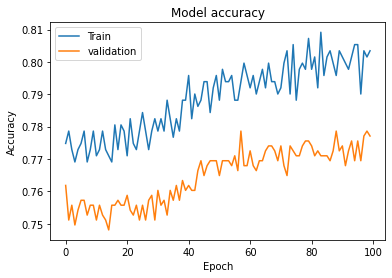

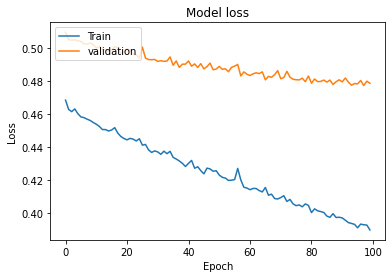

In [75]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

We can see that with increase in epoch, the validation accuracy as well as train accuracy is increasing
With increase in epochs, both the validation loss and train loss are decreasing
This implies that our model is actually learning without much overfitting!!

In [47]:
model.evaluate(xtest,ytest)

5/5 [==============================] - 0s 2ms/step - loss: 0.4803 - accuracy: 0.7634


[0.48034965991973877, 0.7633587718009949]

The above model is giving 76% accuracy on the test set!!!

Saving the Model

In [24]:
model.save('MatchWinnerPredictor.keras')

---